# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd

,City
0,bafq
1,grand river south east
2,puerto ayora
3,hithadhoo
4,taolanaro
...,...
627,balakhninskiy
628,kavaratti
629,hasilpur
630,amqui


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

total_data = cities_pd
total_data['Cloudiness'] = 0
total_data['Country'] = ''
total_data['Date'] = 0
total_data['Humidity'] = 0
total_data['Lat'] = 0
total_data['Lng'] = 0
total_data['Max Temp'] = 0
total_data['Wind Speed'] = 0
params = {}


# Loop through the list of cities and perform a request for data on each
print("--------------------------------------")
print("----- BEGGINING DATA RETRIEVAL -------")
print("--------------------------------------")

for index, row in total_data.iterrows():
        # get city from df
        city = row['City']
    
        # add keyword to params dict
        params['city_name'] = city
    
        # assemble url and make API request
        response = requests.get(query_url + row['City']).json()
    
        try:
            print(f"Processing Record {index} ｜ {city}.")
        
            total_data.loc[index, 'Cloudiness'] = float(response['clouds']['all'])
            total_data.loc[index, 'Country'] = response['sys']['country']
            total_data.loc[index, 'Date'] = float(response['dt'])
            total_data.loc[index, 'Humidity'] = float(response['main']['humidity'])
            total_data.loc[index, 'Lat'] = float(response['coord']['lat'])      
            total_data.loc[index, 'Lng'] = float(response['coord']['lon'])
            total_data.loc[index, 'Max Temp'] = float(response['main']['temp_max'])
            total_data.loc[index, 'Wind Speed'] = float(response['wind']['speed'])
                    
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
print("--------------------------------------")
print("-------- RETRIVAL COMPLETE -----------")
print("--------------------------------------")
total_data

--------------------------------------
----- BEGGINING DATA RETRIEVAL -------
--------------------------------------
Processing Record 0 ｜ bafq.
Processing Record 1 ｜ grand river south east.
Missing field/result... skipping.
Processing Record 2 ｜ puerto ayora.
Processing Record 3 ｜ hithadhoo.
Processing Record 4 ｜ taolanaro.
Missing field/result... skipping.
Processing Record 5 ｜ vostok.
Processing Record 6 ｜ shubarshi.
Processing Record 7 ｜ biak.
Processing Record 8 ｜ hermanus.
Processing Record 9 ｜ yellowknife.
Processing Record 10 ｜ katangli.
Processing Record 11 ｜ alappuzha.
Missing field/result... skipping.
Processing Record 12 ｜ atuona.
Processing Record 13 ｜ kungurtug.
Processing Record 14 ｜ albany.
Processing Record 15 ｜ busselton.
Processing Record 16 ｜ bonga.
Processing Record 17 ｜ aykhal.
Processing Record 18 ｜ te anau.
Processing Record 19 ｜ bathsheba.
Processing Record 20 ｜ umm lajj.
Processing Record 21 ｜ manzhouli.
Processing Record 22 ｜ port hedland.
Processing Record 2

Processing Record 216 ｜ kieta.
Processing Record 217 ｜ bakel.
Processing Record 218 ｜ beyneu.
Processing Record 219 ｜ olinda.
Processing Record 220 ｜ cherlak.
Processing Record 221 ｜ maldonado.
Processing Record 222 ｜ guerrero negro.
Processing Record 223 ｜ narsaq.
Processing Record 224 ｜ acatlan.
Missing field/result... skipping.
Processing Record 225 ｜ sukhobezvodnoye.
Processing Record 226 ｜ ostrovnoy.
Processing Record 227 ｜ salalah.
Processing Record 228 ｜ iqaluit.
Processing Record 229 ｜ cockburn town.
Processing Record 230 ｜ athabasca.
Processing Record 231 ｜ dikson.
Processing Record 232 ｜ zeya.
Processing Record 233 ｜ okha.
Processing Record 234 ｜ sao filipe.
Processing Record 235 ｜ bluff.
Processing Record 236 ｜ mahibadhoo.
Processing Record 237 ｜ faya.
Processing Record 238 ｜ tsihombe.
Missing field/result... skipping.
Processing Record 239 ｜ rio gallegos.
Processing Record 240 ｜ victoria.
Processing Record 241 ｜ sola.
Processing Record 242 ｜ burgeo.
Processing Record 243 ｜ 

Processing Record 426 ｜ sumbawa.
Missing field/result... skipping.
Processing Record 427 ｜ coihaique.
Processing Record 428 ｜ morwell.
Processing Record 429 ｜ chapais.
Processing Record 430 ｜ noshiro.
Processing Record 431 ｜ hindang.
Processing Record 432 ｜ beloha.
Processing Record 433 ｜ nguiu.
Missing field/result... skipping.
Processing Record 434 ｜ husavik.
Processing Record 435 ｜ namatanai.
Processing Record 436 ｜ amderma.
Missing field/result... skipping.
Processing Record 437 ｜ tumannyy.
Missing field/result... skipping.
Processing Record 438 ｜ clyde river.
Processing Record 439 ｜ ayagoz.
Processing Record 440 ｜ aklavik.
Processing Record 441 ｜ quatre cocos.
Processing Record 442 ｜ calvinia.
Processing Record 443 ｜ hampton.
Processing Record 444 ｜ santa maria.
Processing Record 445 ｜ bahia blanca.
Processing Record 446 ｜ sao jose da coroa grande.
Processing Record 447 ｜ dubbo.
Processing Record 448 ｜ westport.
Processing Record 449 ｜ san lorenzo.
Processing Record 450 ｜ summervi

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bafq,0.0,IR,1.569248e+09,22.0,31.60,55.40,23.94,3.00
1,grand river south east,0.0,,0.000000e+00,0.0,0.00,0.00,0.00,0.00
2,puerto ayora,75.0,EC,1.569248e+09,82.0,-0.74,-90.35,20.00,4.10
3,hithadhoo,100.0,MV,1.569248e+09,73.0,-0.60,73.08,27.34,2.01
4,taolanaro,0.0,,0.000000e+00,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
627,balakhninskiy,60.0,RU,1.569248e+09,90.0,58.01,114.28,-0.16,1.15
628,kavaratti,90.0,IN,1.569248e+09,78.0,10.57,72.64,28.14,3.54
629,hasilpur,19.0,PK,1.569248e+09,34.0,29.69,72.55,31.64,1.62
630,amqui,90.0,CA,1.569248e+09,93.0,48.47,-67.43,19.00,6.70


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
total_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bafq,0.0,IR,1.569248e+09,22.0,31.60,55.40,23.94,3.00
1,grand river south east,0.0,,0.000000e+00,0.0,0.00,0.00,0.00,0.00
2,puerto ayora,75.0,EC,1.569248e+09,82.0,-0.74,-90.35,20.00,4.10
3,hithadhoo,100.0,MV,1.569248e+09,73.0,-0.60,73.08,27.34,2.01
4,taolanaro,0.0,,0.000000e+00,0.0,0.00,0.00,0.00,0.00


### Cleaning up data 

In [9]:
# Cleanning Data
# Eliminating values in zero
total_data = total_data[(total_data != 0).all(1)]
# Resetting index
total_data = total_data.reset_index(drop = True) 
total_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,75.0,EC,1.569248e+09,82.0,-0.74,-90.35,20.00,4.10
1,hithadhoo,100.0,MV,1.569248e+09,73.0,-0.60,73.08,27.34,2.01
2,vostok,46.0,RU,1.569248e+09,77.0,46.45,135.83,10.94,2.39
3,shubarshi,99.0,KZ,1.569248e+09,69.0,48.59,57.19,8.84,8.03
4,biak,98.0,ID,1.569248e+09,98.0,-0.91,122.88,17.44,1.38
...,...,...,...,...,...,...,...,...,...
436,balakhninskiy,60.0,RU,1.569248e+09,90.0,58.01,114.28,-0.16,1.15
437,kavaratti,90.0,IN,1.569248e+09,78.0,10.57,72.64,28.14,3.54
438,hasilpur,19.0,PK,1.569248e+09,34.0,29.69,72.55,31.64,1.62
439,amqui,90.0,CA,1.569248e+09,93.0,48.47,-67.43,19.00,6.70


### Verifiying if all the columns have the same data

In [10]:
total_data.count()

City          441
Cloudiness    441
Country       441
Date          441
Humidity      441
Lat           441
Lng           441
Max Temp      441
Wind Speed    441
dtype: int64

### Exporting data to a CSV file

In [11]:
export_csv = total_data.to_csv (r'Output Data/total_data.csv', index = "City", header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Verify data types to plot

In [12]:
total_data.dtypes

City           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

#### Create a Function to Plot

In [13]:
def scatter_plot(x_values,y_values, title, x_label, y_label, file_name):
    plt.scatter(x_values,y_values)
    plt.title(title,fontweight="bold");
    plt.xlabel(x_label,fontweight="bold");
    plt.ylabel(y_label,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    plt.savefig('Output Data/'+ file_name +'.png')
    plt.show()

#### Latitude vs. Temperature Plot

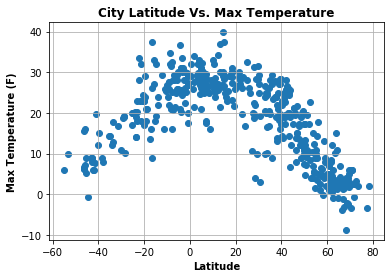

In [14]:
x_values = total_data['Lat']
y_values = total_data['Max Temp']
title = "City Latitude Vs. Max Temperature"
x_label = "Latitude"
y_label = "Max Temperature (F)"
file_name = "fig.1 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Humidity Plot

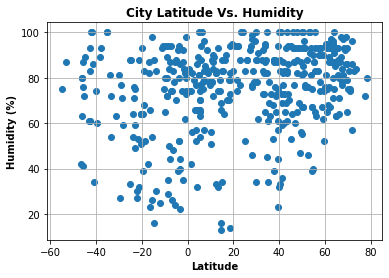

In [15]:
x_values = total_data['Lat']
y_values = total_data['Humidity']
title = "City Latitude Vs. Humidity"
x_label = "Latitude"
y_label = "Humidity (%)"
file_name = "fig.2 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Cloudiness Plot

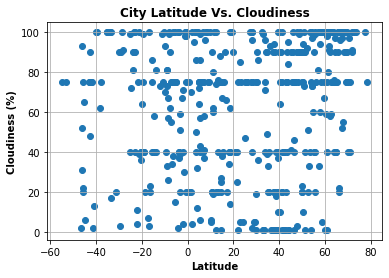

In [16]:
x_values = total_data['Lat']
y_values = total_data['Cloudiness']
title = "City Latitude Vs. Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness (%)"
file_name = "fig.3 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Wind Speed Plot

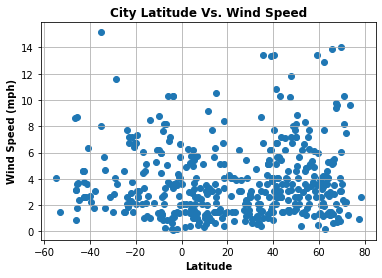

In [17]:
x_values = total_data['Lat']
y_values = total_data['Wind Speed']
title = "City Latitude Vs. Wind Speed"
file_name = "fig.4 - " + title
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

## Linear Regression

### Function to Plot the Linear Regression

In [99]:
# OPTIONAL: Create a function to create Linear Regression plots

def scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, eq_location):
    # Define the Location of the Linear Regression Equation
    if eq_location == 'UpperRight':
        loc_x = x_values.max()
        loc_y = y_values.max()
    elif eq_location == 'LowerRight':
        loc_x = x_values.max() - (x_values.max()-x_values.min())/2
        loc_y = y_values.min() 
    elif eq_location == 'UpperLeft':
        loc_x = x_values.min()
        loc_y = y_values.max() - (y_values.max()-y_values.min())/8
    elif eq_location == 'LowerLeft':
        loc_x = x_values.min()
        loc_y = y_values.min()
    elif eq_location == 'Middle':
        loc_x = (x_values.max()- x_values.min())/2
        loc_y = (y_values.max()- y_values.min())/2
    
    # Perform a linear regression on latitude vs. temperature
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    # print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"firebrick")

    # Label plot and annotate the line equation
    plt.annotate(line_eq,(loc_x,  loc_y),
                 fontsize=15,color="firebrick")   
    plt.title(chart_title ,fontweight="bold");
    plt.xlabel(x_label ,fontweight="bold");
    plt.ylabel(y_label ,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    # Save Plot
    plt.savefig('Output Data/'+ file_name +'.png')
    
    # Print r square value
    print(f"The r-squared is: {rvalue}")

    # Show plot
    plt.show()

### Southern Hempisphere Data

In [100]:
# Create Southern Hemisphere DataFrames
total_data_south = total_data.loc[(total_data['Lat'] >= -90) & (total_data['Lat'] <= 0)]
total_data_south

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,75.0,EC,1.569248e+09,82.0,-0.74,-90.35,20.00,4.10
1,hithadhoo,100.0,MV,1.569248e+09,73.0,-0.60,73.08,27.34,2.01
4,biak,98.0,ID,1.569248e+09,98.0,-0.91,122.88,17.44,1.38
6,atuona,70.0,PF,1.569248e+09,80.0,-9.80,-139.03,25.94,8.76
8,busselton,100.0,AU,1.569248e+09,54.0,-33.64,115.35,12.78,4.69
...,...,...,...,...,...,...,...,...,...
423,monte alegre de sergipe,93.0,BR,1.569248e+09,65.0,-10.03,-37.56,26.84,6.21
427,ahipara,100.0,NZ,1.569248e+09,100.0,-35.17,173.16,14.44,15.14
429,launceston,2.0,AU,1.569248e+09,86.0,-41.43,147.14,7.78,3.60
430,banjar,55.0,ID,1.569248e+09,94.0,-7.37,108.54,20.74,0.30


### Northern Hemisphere Data

In [101]:
# Create Northern Hemisphere DataFrames
total_data_north = total_data.loc[(total_data['Lat'] >= 0) & (total_data['Lat'] <= 90)]
total_data_north

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,vostok,46.0,RU,1.569248e+09,77.0,46.45,135.83,10.94,2.39
3,shubarshi,99.0,KZ,1.569248e+09,69.0,48.59,57.19,8.84,8.03
5,yellowknife,75.0,CA,1.569248e+09,87.0,62.45,-114.38,6.00,7.70
7,albany,1.0,US,1.569248e+09,65.0,42.65,-73.75,26.67,5.61
9,bonga,37.0,ET,1.569248e+09,96.0,7.26,36.25,17.64,0.51
...,...,...,...,...,...,...,...,...,...
436,balakhninskiy,60.0,RU,1.569248e+09,90.0,58.01,114.28,-0.16,1.15
437,kavaratti,90.0,IN,1.569248e+09,78.0,10.57,72.64,28.14,3.54
438,hasilpur,19.0,PK,1.569248e+09,34.0,29.69,72.55,31.64,1.62
439,amqui,90.0,CA,1.569248e+09,93.0,48.47,-67.43,19.00,6.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8505750782319356


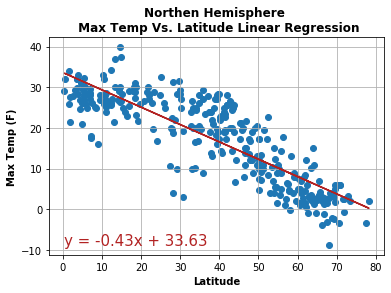

In [102]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Max Temp"]
chart_title = "Northen Hemisphere \n Max Temp Vs. Latitude Linear Regression"
file_name = "Fig.5 - Northen Hemisphere - Max Temp Vs. Linear Regression"
x_label = "Latitude"
y_label = "Max Temp (F)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'LowerLeft')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7982002458783759


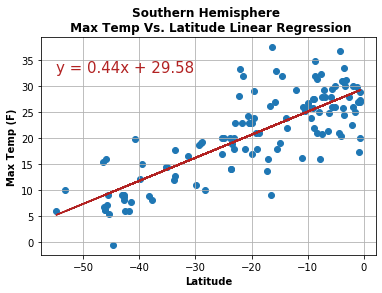

In [103]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Max Temp"]
chart_title = "Southern Hemisphere \n Max Temp Vs. Latitude Linear Regression"
file_name = "Fig.6 - Southern Hemisphere - Max Temp Vs. Linear Regression"
x_label = "Latitude"
y_label = "Max Temp (F)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18074605544125488


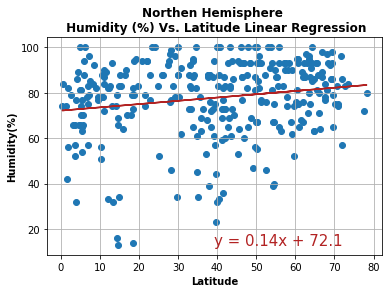

In [104]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Humidity"]
chart_title = "Northen Hemisphere \n Humidity (%) Vs. Latitude Linear Regression"
file_name = "Fig.7 - Northen Hemisphere - Humidity(%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Humidity(%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerRight')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.08743889702981517


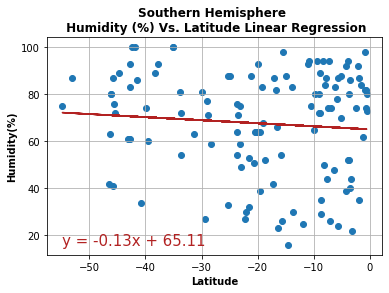

In [105]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Humidity"]
chart_title = "Southern Hemisphere \n Humidity (%) Vs. Latitude Linear Regression"
file_name = "Fig.8 - Southern Hemisphere - Humidity(%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Humidity(%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerLeft')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2065731702904356


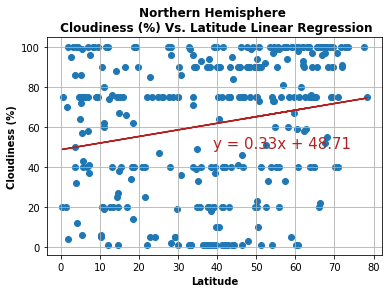

In [106]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Cloudiness"]
chart_title = "Northern Hemisphere \n Cloudiness (%) Vs. Latitude Linear Regression"
file_name = "Fig.9 - Northern Hemisphere - Cloudiness (%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Cloudiness (%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'Middle')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03096080984281047


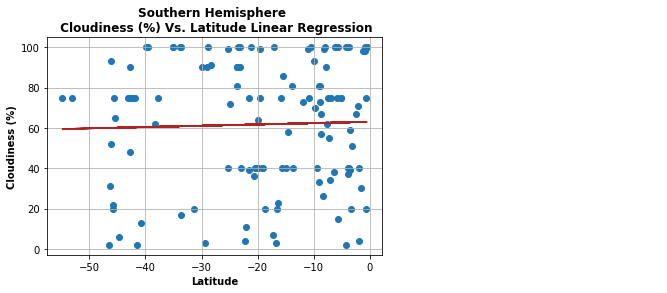

In [107]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Cloudiness"]
chart_title = "Southern Hemisphere \n Cloudiness (%) Vs. Latitude Linear Regression"
file_name = "Fig.10 - Southern Hemisphere - Cloudiness (%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Cloudiness (%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'Middle')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2121372383991906


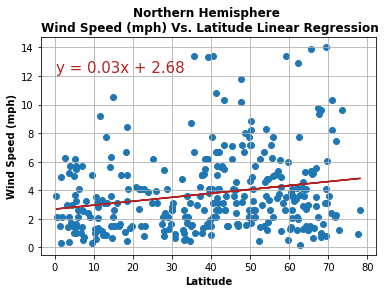

In [108]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Wind Speed"]
chart_title = "Northern Hemisphere \n Wind Speed (mph) Vs. Latitude Linear Regression"
file_name = "Fig.11 - Northern Hemisphere - Wind Speed (mph) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.03714619720867453


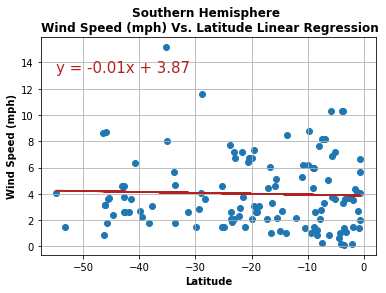

In [109]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Wind Speed"]
chart_title = "Southern Hemisphere \n Wind Speed (mph) Vs. Latitude Linear Regression"
file_name = "Fig.12 - Southern Hemisphere - Wind Speed (mph) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')